# 03AgeCOVID19

# Libraries

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display


sns.set_palette("pastel")

# Loading Data

In [17]:
age = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\age.csv", parse_dates=["date"])
age['date'] = pd.to_datetime(age['date'], format='%y/%m/%d')

# age = pd.read_csv("C:\py\Projects\TuringCollege\COVID19\DataSets\\age.csv", index_col = "date", parse_dates = True)

# Size

In [18]:
age.shape

(1089, 5)

# Missing Data

In [19]:
age.isna().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

# Renaming Columns

In [20]:
age.rename(
    columns={
        "date": "Date",
        "age": "Age",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

# Drop Unneeded Column 

In [21]:
pd.set_option("max_rows", None)
age.drop('time', inplace = True, axis = 1)

# The Dataset

In [22]:
age.head()

,Date,Age,Confirmed,Deceased
0,2020-03-02,0s,32,0
1,2020-03-02,10s,169,0
2,2020-03-02,20s,1235,0
3,2020-03-02,30s,506,1
4,2020-03-02,40s,633,1


# Groupby

In [28]:
# groupby_age = age.groupby(['Age'])['Confirmed'].max()

# groupby_age = groupby_age.reset_index()
# groupby_age

groupby_age = (
    age[["Age", "Confirmed"]]
    .groupby(["Age"])
    .max()
    .sort_values("Confirmed", ascending=False)
)

groupby_age = groupby_age.reset_index()
groupby_age

,Age,Confirmed
0,20s,3362
1,50s,2286
2,40s,1681
3,60s,1668
4,30s,1496
5,70s,850
6,10s,708
7,80s,556
8,0s,193


# Weekly

In [29]:
# age_groupby['Date'] = pd.to_datetime(age_groupby['Date'], format='%y/%m/%d')

age_groupby.asfreq(freq='W')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

# Confirmed by Age

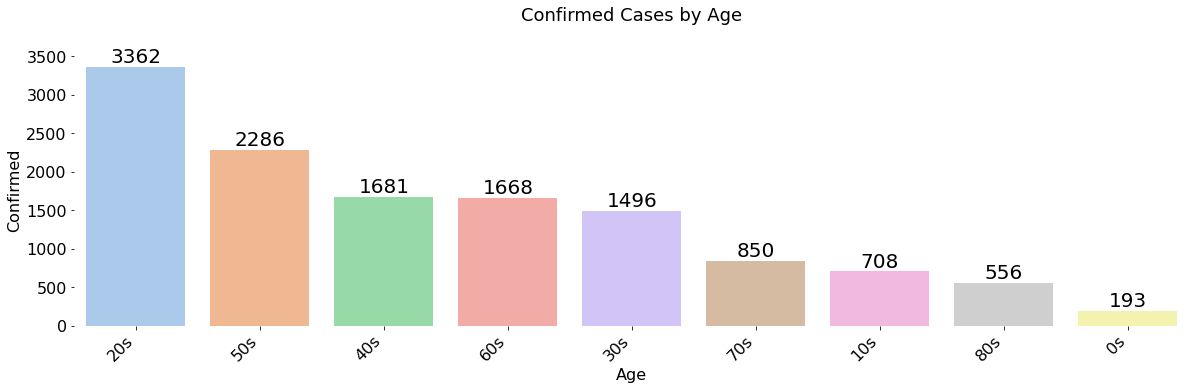

In [31]:
age.reset_index(inplace=True)

plt.figure(figsize=(20, 5))
chart = sns.barplot(
    x="Age",
    y="Confirmed",
    data=groupby_age,
    estimator=sum,
    order=groupby_age.sort_values("Confirmed", ascending=False).Age,
    ci=None
)
sns.despine(left=True, bottom=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Confirmed", fontsize=16)
plt.title("Confirmed Cases by Age", fontsize=18, y=1.1)


chart.bar_label(chart.containers[0], size=20)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

# Deceased by Age

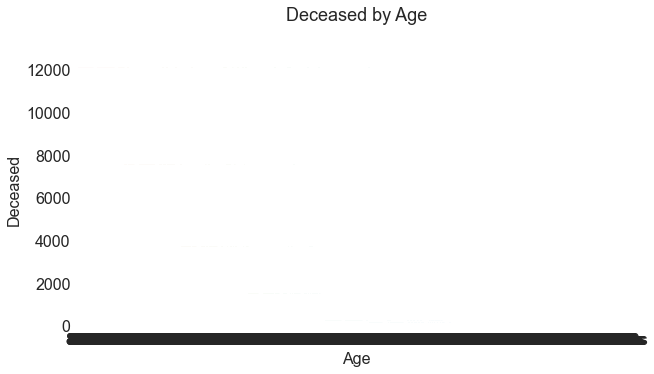

In [111]:
sns.set_style('white')

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Age",
    y="Deceased",
    data=age,
    estimator=sum,
    ci=None,
    order=age.sort_values("Deceased", ascending=False).Age,
)
sns.despine(left=True, bottom=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.ylabel("Deceased", fontsize=16)
plt.title("Deceased by Age", fontsize=18, y=1.1)

chart.bar_label(chart.containers[0], size=20)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');